## Part 2 - The impact of user type and gender on the durations time
### by Pius Imwene

## Investigation Overview

On this presentation, I will mainly focus on the following variables to find their relationships. They include durations time for trip, the user type and gender of the participants. I will use the scatterplots and box pot to finding their trend or pattern.Additionally, i will use histogram to investigation the distributions of durations time in seconds after log transformation.

## Dataset Overview

Initially, dataset has 183412 rows and columns of 16. After preliminalry wrangling, the number of rows become 174952 and 20 columns (some columns were added). The columns that are strings are end_station_name, user_type, member_gender,member_gender and bike_share_for_al, start_month, end_month. The other 13 columns (variables) are numerics.

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# loading data into juypter as bike_data
bike_data=pd.read_csv('201902-fordgobike-tripdata.csv')
#making the copy of original bike_data dataset
bike_data_copy= bike_data.copy()
#drop rows with missing values
bike_data_copy.dropna(inplace=True, axis=0)
#check the sum of missing values in bike_data_copy
sum(bike_data_copy.isnull().sum())
#Convert the start time, end time columns into datetime.
bike_data_copy['start_time'] = pd.to_datetime(bike_data_copy['start_time'])
bike_data_copy['end_time'] = pd.to_datetime(bike_data_copy['end_time'])
#convert start_time and end_time into start_day and end_day
bike_data_copy['start_day'] = bike_data_copy['start_time'].dt.day_name()
bike_data_copy['end_day'] = bike_data_copy['end_time'].dt.day_name()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_data_copy['start_day'] = pd.Categorical(bike_data_copy['start_day'], categories=days, ordered=True)
bike_data_copy = bike_data_copy.sort_values('start_day')
#Convert start_time and end_time into months.
bike_data_copy['start_month'] = bike_data_copy['start_time'].dt.month_name()
bike_data_copy['end_month'] = bike_data_copy['end_time'].dt.month_name()
#convert start_station_id,end_station_id and bike_id of bike_data_copy into strings
bike_data_copy.start_station_id=bike_data_copy.start_station_id.astype(str)
bike_data_copy.end_station_id =bike_data_copy.end_station_id.astype(str)
bike_data_copy.bike_id =bike_data_copy.bike_id.astype(str)
# convert seconds  into hours
bike_data_copy['duration_hours'] = bike_data_copy['duration_sec'] /3600
#Replace 1878 with 1978 to be realistics.
bike_data_copy.replace(1878, 1978, inplace=True)
# creating the column for age of the participants
bike_data_copy['participant_age']=(2019-bike_data_copy.member_birth_year)

### Distribution of durations times (sec) for the trip.

The distribution of the duration time for the trip skewes to the right. After transformation usin log scale, the distribution of durations become normal with peak between 400 and 800.

In [15]:
#create a functions that will apply to all plot for xlabel, ylabel and title
def a_b_c(Alab, Blab, title):
    plt.title(title)
    plt.xlabel(Alab)
    plt.ylabel(Blab)

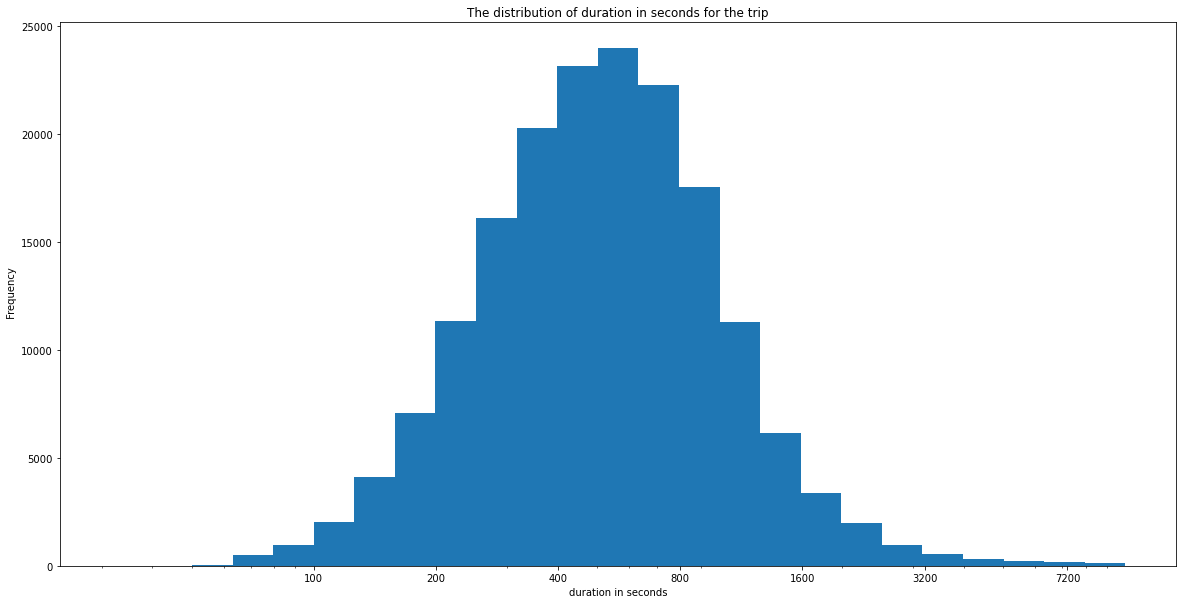

In [16]:
# Since the graph has log tail, we transform using log transformation to understand data easily.
plt.figure(figsize=(20, 10))
bins = 10**np.arange(1.5,  4+0.1 , 0.1)
plt.hist(data = bike_data_copy , x = 'duration_sec' , bins = bins);
plt.xscale('log');
plt.xticks([100, 200, 400, 800, 1600, 3200, 7200],[100, 200, 400, 800, 1600, 3200, 7200])
a_b_c('duration in seconds',' Frequency', 'The distribution of duration in seconds for the trip');

### The relationship between participants' age and durations times(s) after transformed using log scale and inverse

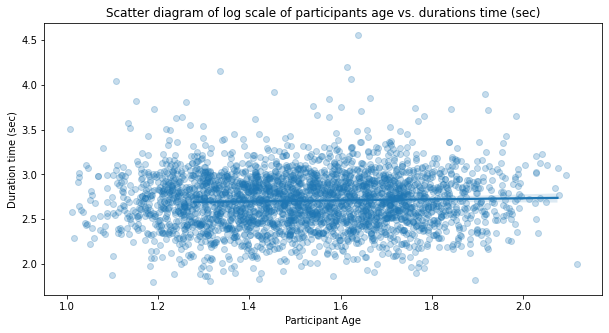

In [5]:
# scatterplot of participants age and durations times after transformed using log scale and inverse.
plt.figure(figsize=(10,5))
df=bike_data_copy.sample(3000, replace=False)
def log(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
sb.regplot(df['participant_age'].apply(log), df['duration_sec'].apply(log),  scatter_kws={'alpha':1/4}, x_jitter=0.3)
a_b_c('Participant Age', 'Duration time (sec)', 'Scatter diagram of log scale of participants age vs. durations time (sec)')
plt.show()

### The relationship between gender and user type.
From the clustered bar chart, it indicate that there is a relationship between user type and gender. For example, males have a higher relationship with user type especially in subscriber than females.

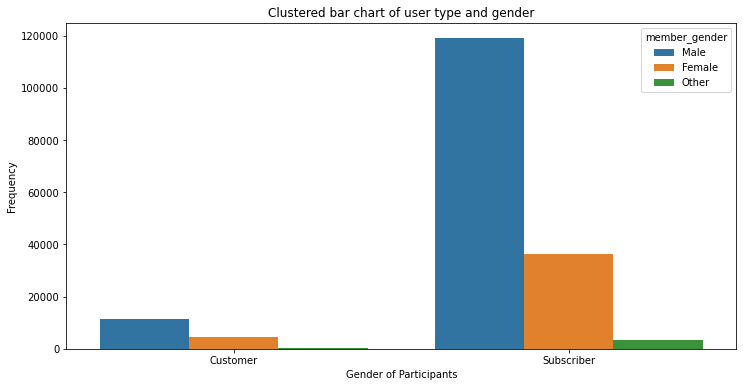

In [6]:
#clustered bar charts for user_type and gender
plt.figure(figsize=(12,6))
sb.countplot(data=bike_data_copy, x ='user_type', hue='member_gender')
a_b_c('Gender of Participants', 'Frequency', 'Clustered bar chart of user type and gender')
plt.show()

In [32]:
!jupyter nbconvert Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II.ipynb to slides
[NbConvertApp] Writing 731458 bytes to Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\pc\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\pc\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\pc\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\pc\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\pc\anaconda3\lib\site-packag